# Maximum Product Subarray

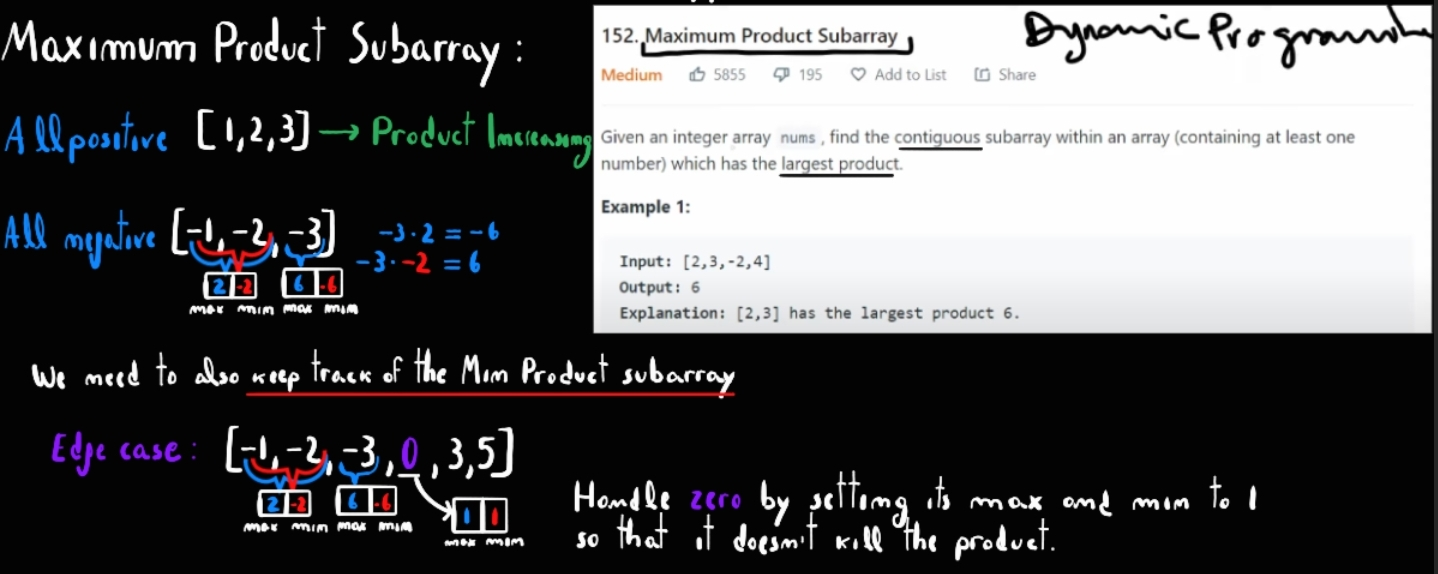

In [ ]:
from typing import List


class Solution:
    def max_product(self, nums: List[int]) -> int:
        # initialize to the max of the array because
        # we will never get a lower value
        res = max(nums)
        curr_min, curr_max = 1, 1
        for n in nums:
            # temp because we want the old curr_max (or curr_min)
            # to calculate the curr_min or (curr_max), depending
            # on which one we compute first
            temp = curr_min
            # using 'n' as the third argument deals with the
            # zero edge case
            curr_min = min(curr_min * n, curr_max * n, n)
            curr_max = max(curr_max * n, temp * n, n)
        return max(res, curr_max)


sol = Solution()
sol.max_product([1, 2, 0, 3])

# Coin Change

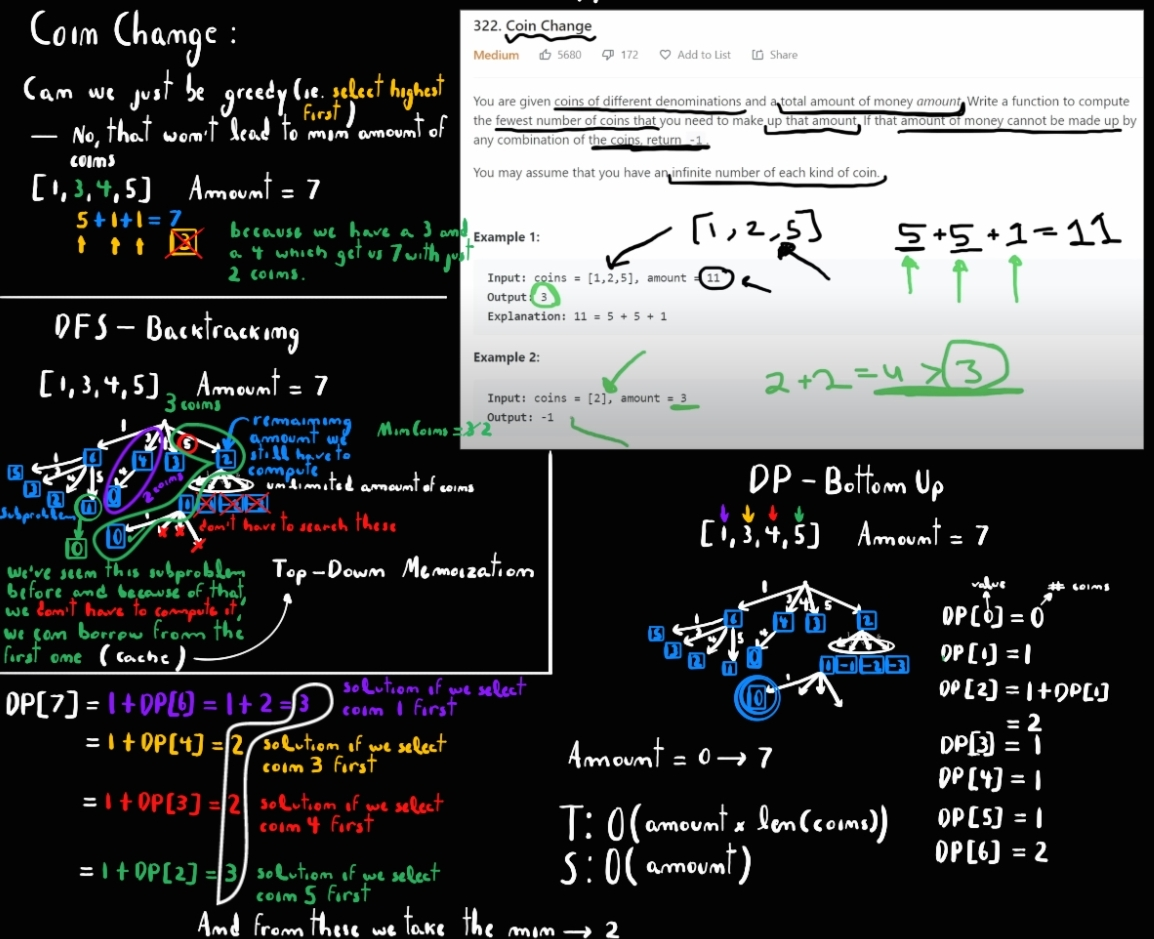

In [ ]:
from typing import List


class Solution:
    def coin_change(self, coins: List[int], amount: int) -> int:
        # we initialize every position to amount + 1 as this is a max value
        # could also use math infinity or max integer
        dp = [amount + 1] * (amount + 1)
        # base case (to compute amount 0, it takes 0 coins)
        dp[0] = 0
        # now we compute the other amounts up to and including 'amount'
        for a in range(1, amount + 1):
            for c in coins:
                # we are trying to compute this a amount
                # the condition tells us we can keep on
                # searching or we've got there (if zero)
                if a - c >= 0:
                    # the 1 is the c coin, dp[a - c]
                    dp[a] = min(dp[a] + 1 + dp[a - c])
        # we return if dp[amount]
        return dp[amount] if dp[amount] != amount + 1 else -1